##### Step 1. Hypothesis Generation

How does it help? This practice usually helps you form better features later on, which are not biased by the data available in the dataset.

Here are some of the hypothesis which I thought could influence the demand of bikes:

* Hourly trend: There must be high demand during office timings. Early morning and late evening can have different trend (cyclist) and low demand during 10:00 pm to 4:00 am.
* Daily Trend: Registered users demand more bike on weekdays as compared to weekend or holiday.
* Rain: The demand of bikes will be lower on a rainy day as compared to a sunny day. Similarly, higher humidity will cause to lower the demand and vice versa.
* Temperature: In India, temperature has negative correlation with bike demand. But, after looking at Washington’s temperature graph, I presume it may have positive correlation.
* Pollution: If the pollution level in a city starts soaring, people may start using Bike (it may be influenced by government / company policies or increased awareness).
* Time: Total demand should have higher contribution of registered user as compared to casual because registered user base would increase over time.
* Traffic: It can be positively correlated with Bike demand. Higher traffic may force people to use bike as compared to other road transport medium like car, taxi etc

### Getting to know the data

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [2]:
#https://en.wikipedia.org/wiki/Benford%27s_law
#Benford Law in stock market, electricity bills etc..
import csv
from collections import defaultdict
from math import log10
import matplotlib
matplotlib.use("Agg") #Needed to save figures
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Get counts for starting digit in columns: counts, registered, casual
d = defaultdict(int)
for e, row in enumerate(csv.DictReader(open(r"C:\Users\piush\Desktop\Dataset\BikeSharing/train.csv"))):
    d[row["count"][0]] += 1
    d[row["registered"][0]] += 1
    d[row["casual"][0]] += 1

In [4]:
#Dont count zero as a starting digit
del d["0"]

In [5]:
#Scaling
total_numbers = sum(d.values())
d = sorted([(d[k]/float(total_numbers),k) for k in d],reverse=True)

In [6]:
#Comparison
benford = [(log10(1+1.0/i),str(i)) for i in range(1,10)]

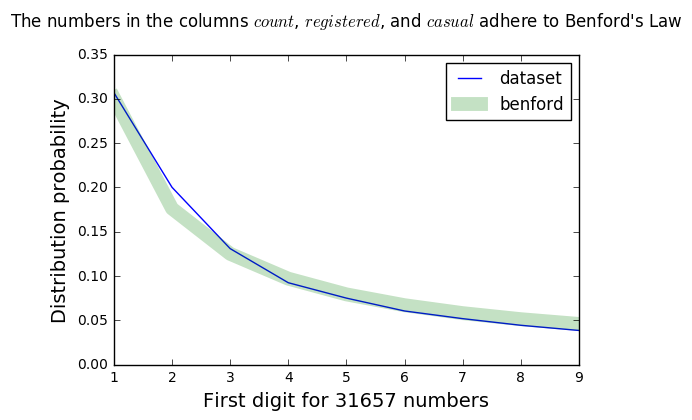

In [7]:
#Plot first digit distribution vs. Benford
plt.plot([x[0] for x in d],label='dataset')
plt.plot([x[0] for x in benford],label='benford',linewidth=10,alpha=0.23)

plt.ylabel("Distribution probability", fontsize=14)
plt.xlabel("First digit for %s numbers"%total_numbers, fontsize=14)
plt.title("The numbers in the columns $count$, $registered$, and $casual$ adhere to Benford's Law\n", fontsize=12)
plt.xticks([x for x in range(len(d))],[int(x[1]) for x in d])
plt.legend()
plt.savefig("Benford.png")

In [8]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import math


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [12]:
##AUTOMATICLY! LOVELY!!
########################
import pandas as pd
import sklearn as sk

def get_feature_mat(fname):
#feature engineering in this funciton is applied to both test and train
    df 	= pd.read_csv(r"C:\Users\piush\Desktop\Dataset\BikeSharing/"+fname)
    return(df)

In [13]:
train, test = [get_feature_mat(fname) for fname in ['train.csv', 'test.csv']]
print('\nSummary of train dataset:\n')
print(train.describe())
print('\nSummary of test dataset:\n')
print(test.describe())


Summary of train dataset:

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.24503

In [14]:
#Separarting the dates
train["month"] = pd.DatetimeIndex(train['datetime']).month
train["day"] = pd.DatetimeIndex(train['datetime']).day
train["hour"] = pd.DatetimeIndex(train['datetime']).hour

In [15]:
train["res_reg"] = np.nan
print('\nSummary of train dataset modified:\n')
print(train.describe())



Summary of train dataset modified:

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601    

In [17]:
train_month = train.ix[(train.workingday == 1) & (train.month == 2) & (train.day < 16),]
lmod1 = smf.ols(formula = "np.log10(registered+1) ~ C(hour) + temp + humidity + windspeed", data = train_month).fit()
print('\nSummary of Linear Regression model:\n')
print(lmod1.summary())


Summary of Linear Regression model:

                               OLS Regression Results                               
Dep. Variable:     np.log10(registered + 1)   R-squared:                       0.923
Model:                                  OLS   Adj. R-squared:                  0.919
Method:                       Least Squares   F-statistic:                     225.8
Date:                      Mon, 31 Oct 2016   Prob (F-statistic):          1.79e-254
Time:                              06:01:41   Log-Likelihood:                 163.14
No. Observations:                       519   AIC:                            -272.3
Df Residuals:                           492   BIC:                            -157.5
Df Model:                                26                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------

In [18]:
vallm1 = np.round(10**lmod1.predict(train_month)-1)
vallm1 = np.where(vallm1 >= 0, vallm1, 0)
train.ix[(train.workingday == 1) & (train.month == 2) & (train.day < 16),["res_reg"]] = train.ix[(train.workingday == 1) & (train.month == 2) & (train.day < 16),]["registered"] - vallm1

In [19]:
test_month = train.ix[(train.workingday == 1) & (train.month == 2) & (train.day >= 16),]
vallm1 = np.round(10**lmod1.predict(test_month)-1)
vallm1 = np.where(vallm1 >= 0, vallm1, 0)
train.ix[(train.workingday == 1) & (train.month == 2) & (train.day >= 16),["res_reg"]] = train.ix[(train.workingday == 1) & (train.month == 2) & (train.day >= 16),]["registered"] - vallm1

In [20]:
train_month = train.ix[(train.workingday == 1) & (train.month == 2) & (train.day < 16),]
test_month  = train.ix[(train.workingday == 1) & (train.month == 2) & (train.day >= 16),]

In [21]:
obs_log = np.log(test_month['registered']+1)
pred_log = np.log(vallm1+1)
print('\nRMSLE:\n')
print(math.sqrt(((obs_log-pred_log)**2).mean()))


RMSLE:

0.5079225527069858


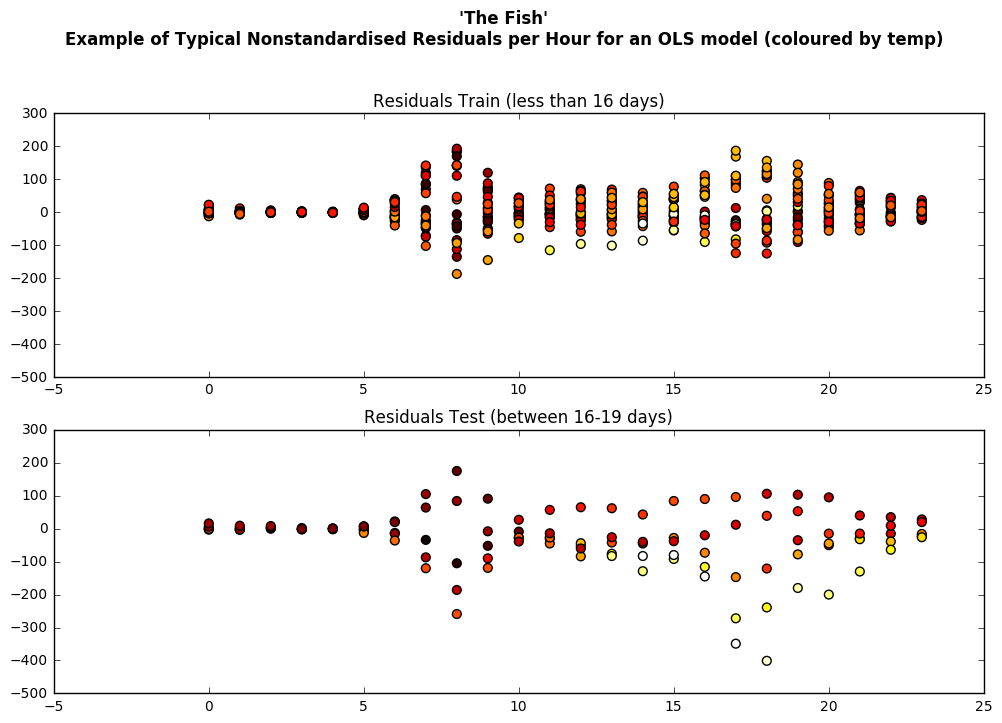

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharey=True)
f.suptitle("'The Fish'\nExample of Typical Nonstandardised Residuals per Hour for an OLS model (coloured by temp)\n", fontsize=12, fontweight='bold')
f.subplots_adjust(top=0.85)
#f.tight_layout()
ax1.scatter(train_month.hour, train_month.res_reg, c = train_month.temp, s=40, cmap='hot')
ax1.set_title('Residuals Train (less than 16 days)')
ax2.scatter(test_month.hour ,test_month.res_reg, c = test_month.temp, s=40, cmap='hot')
ax2.set_title('Residuals Test (between 16-19 days)')
plt.savefig("2_scatter.png")

#### Average Daily Rental Counts by Month


In [23]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import datetime
import pandas as pd

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [24]:
#Read our data into dataframe
df = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\BikeSharing/train.csv")


In [25]:
#Prepare the dataframe for grouping on date
df["datetime"] = pd.to_datetime(df["datetime"])
df['datetime_minus_time'] = df["datetime"].apply(lambda df: datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["datetime_minus_time"],inplace=True)

In [27]:
#Get our data
avg_counts_per_month = df["count"].resample("M").sum()

In [28]:
avg_counts_per_month

datetime_minus_time
2011-01-31     23552
2011-02-28     32844
2011-03-31     38735
2011-04-30     50517
2011-05-31     79713
2011-06-30     89776
2011-07-31     92848
2011-08-31     83296
2011-09-30     79104
2011-10-31     79522
2011-11-30     70889
2011-12-31     61183
2012-01-31     56332
2012-02-29     66269
2012-03-31     94766
2012-04-30    116885
2012-05-31    120434
2012-06-30    130957
2012-07-31    121769
2012-08-31    130220
2012-09-30    133425
2012-10-31    127912
2012-11-30    105551
2012-12-31     98977
Freq: M, Name: count, dtype: int64

In [29]:
xticks = [k.strftime('%b %Y') for k in list(avg_counts_per_month.index)]

In [30]:
xticks

['Jan 2011',
 'Feb 2011',
 'Mar 2011',
 'Apr 2011',
 'May 2011',
 'Jun 2011',
 'Jul 2011',
 'Aug 2011',
 'Sep 2011',
 'Oct 2011',
 'Nov 2011',
 'Dec 2011',
 'Jan 2012',
 'Feb 2012',
 'Mar 2012',
 'Apr 2012',
 'May 2012',
 'Jun 2012',
 'Jul 2012',
 'Aug 2012',
 'Sep 2012',
 'Oct 2012',
 'Nov 2012',
 'Dec 2012']

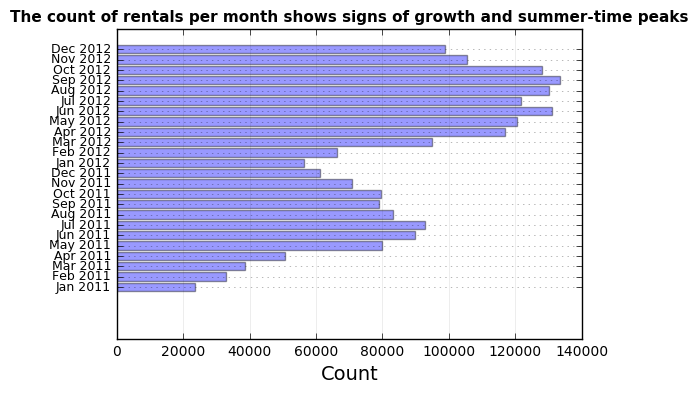

In [31]:
#plotting
plt.barh([x for x in range(len(xticks))], list(avg_counts_per_month), align='center', alpha=0.4)
plt.yticks([x for x in range(len(xticks))], xticks,fontsize=9)

plt.xlabel("Count", fontsize=14)
plt.title("The count of rentals per month shows signs of growth and summer-time peaks", fontsize=11, fontweight='bold')
plt.gca().xaxis.grid(True,linestyle='-',alpha=0.1)
plt.gca().yaxis.grid(True,alpha=0.4)
plt.savefig("monthly-rental-counts.png")

In [32]:
train = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\BikeSharing/train.csv", parse_dates=["datetime"])

In [33]:
train["hour"] = pd.DatetimeIndex(train['datetime']).hour
train["month"] = pd.DatetimeIndex(train['datetime']).month

In [34]:
train["temp"] =  train.temp*9.0/5.0+32.0
train["temp_jittered"] = train.temp + np.random.randn(len(train))
train["hour_jittered"] = train.hour + np.random.randn(len(train))
train["atemp"] = train.atemp*9.0/5.0+32.0
train["count"] = np.float64(train["count"])
print(train.head())
print("Train Shape: %d" % train.shape[0])

             datetime  season  holiday  workingday  weather    temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  49.712  57.911   
1 2011-01-01 01:00:00       1        0           0        1  48.236  56.543   
2 2011-01-01 02:00:00       1        0           0        1  48.236  56.543   
3 2011-01-01 03:00:00       1        0           0        1  49.712  57.911   
4 2011-01-01 04:00:00       1        0           0        1  49.712  57.911   

   humidity  windspeed  casual  registered  count  hour  month  temp_jittered  \
0        81        0.0       3          13   16.0     0      1      48.494611   
1        80        0.0       8          32   40.0     1      1      46.753553   
2        80        0.0       5          27   32.0     2      1      47.237699   
3        75        0.0       3          10   13.0     3      1      49.030019   
4        75        0.0       0           1    1.0     4      1      51.176690   

   hour_jittered  
0       2.285655  


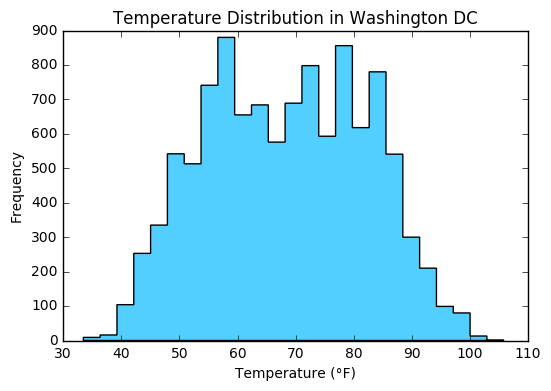

In [35]:
plt.figure()
n, bins, h = plt.hist(train.temp, bins=25, histtype='stepfilled')
plt.setp(h, facecolor='#53cfff')
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temperature Distribution in Washington DC")
plt.savefig("1_hist.png")

In [36]:
weekend = train[(train.workingday==0) & (train.holiday==0)]
print("Weekend Samples: %d" % weekend.shape[0])
weekend_noon = weekend[weekend.hour==12]
print("Weekend at noon samples: %d" % weekend_noon.shape[0])


Weekend Samples: 3163
Weekend at noon samples: 132


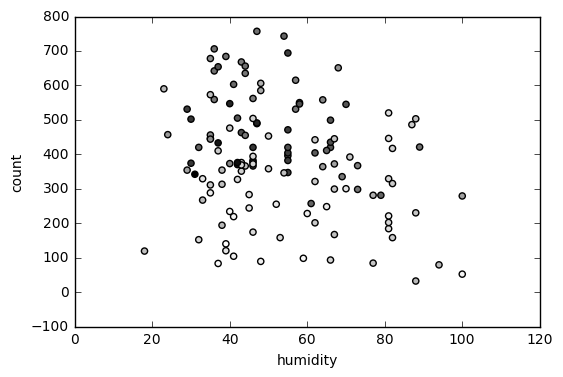

In [37]:
plt.figure()
weekend_noon.plot(kind='scatter', x='humidity', y='count', c=weekend_noon.temp)
plt.savefig("2_scatter.png")

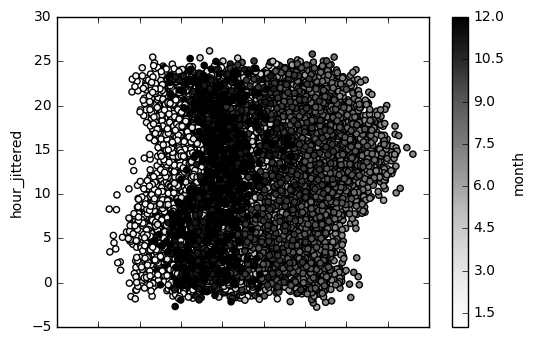

In [38]:
plt.figure()
train.plot(kind='scatter', x='temp_jittered', y='hour_jittered', c='month')
plt.savefig("3_scatter.png")

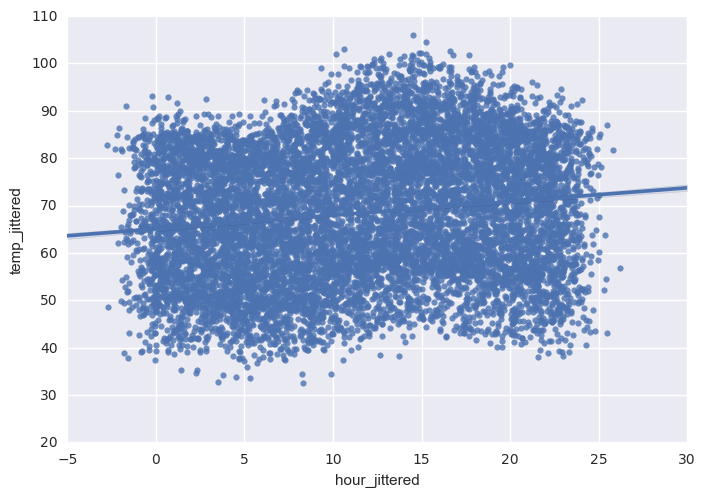

In [40]:
import seaborn as sns

plt.figure()
sns.regplot("hour_jittered", "temp_jittered", data=train)
plt.savefig("4_scatter.png")

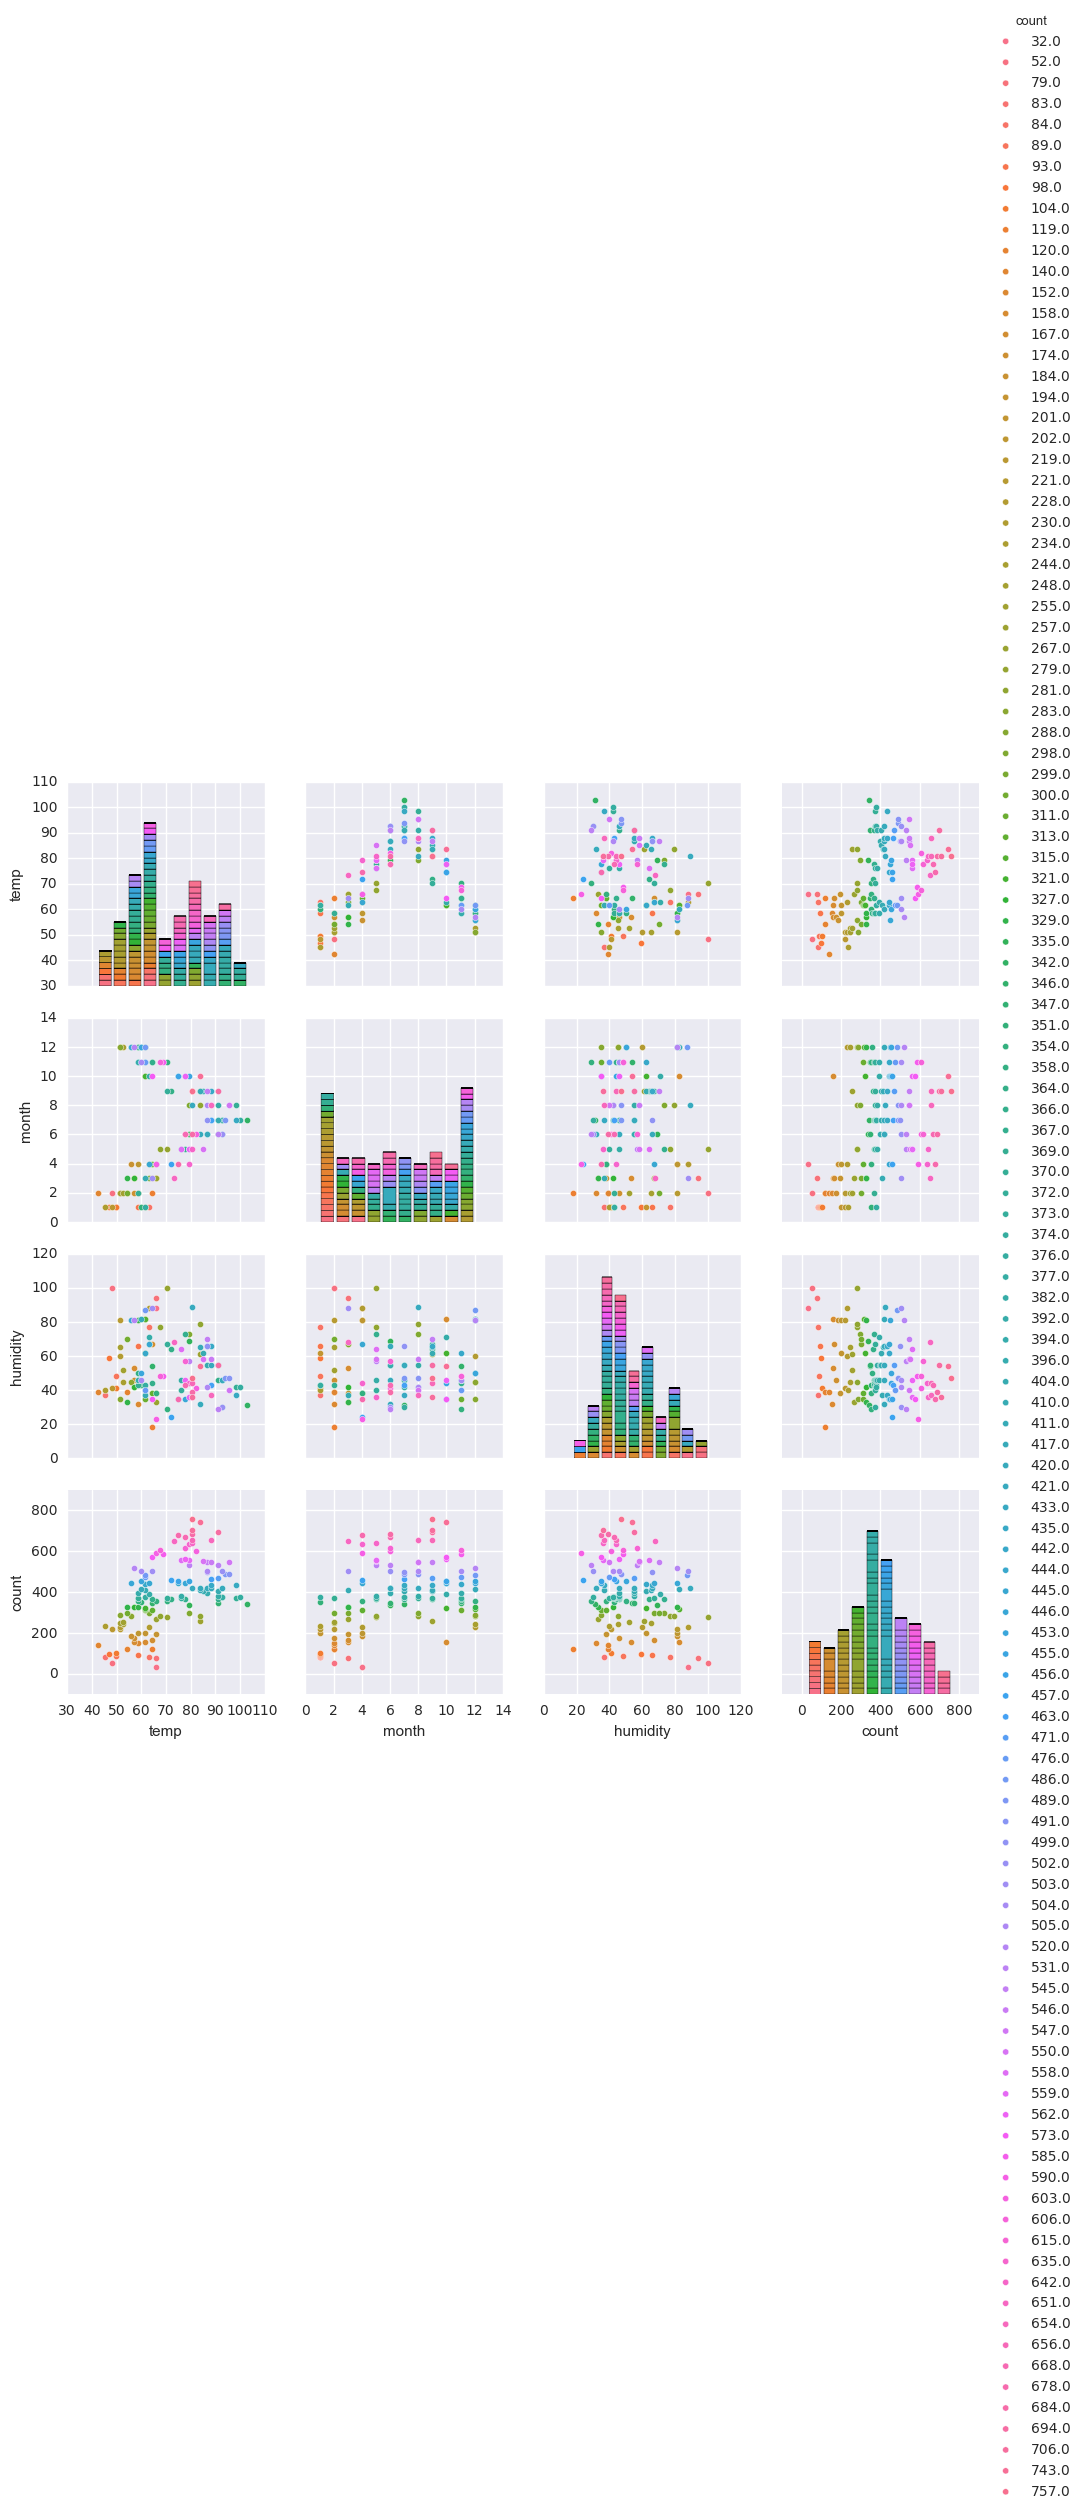

In [41]:
plt.figure()
sns.pairplot(data=weekend_noon[["temp", "month", "humidity", "count"]], hue="count")
plt.savefig("5_pair.png")

### Feature Selection

In [42]:
import pandas as pd
import sklearn as sk
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [43]:
#read train data
train = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\BikeSharing/train.csv", parse_dates=["datetime"])
train["hour"] = pd.DatetimeIndex(train['datetime']).hour
train["month"] = pd.DatetimeIndex(train['datetime']).month
train["day"] = pd.DatetimeIndex(train['datetime']).day
train["year"] = pd.DatetimeIndex(train['datetime']).year
train["temp"] =  train.temp*9.0/5.0+32
train["atemp"] = train.atemp*9.0/5.0+32

trainCV= train.ix[(train.day <19),] 
testCV = train.ix[(train.day >=19),]


In [44]:
#Feature selection
feature_cols = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour']

X_train = trainCV[feature_cols]
y_train = trainCV["count"]
X_test = testCV[feature_cols]
y_test = testCV["count"]

from sklearn.ensemble import ExtraTreesClassifier
params = {'n_estimators': 50, 'random_state': np.random.RandomState(1)}

clf = ExtraTreesClassifier(**params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('\nCorrelation coefficients:\n')
print(np.corrcoef(y_pred, y_test))
print('\nFeature importances:\n')
print(clf.feature_importances_ )



Correlation coefficients:

[[ 1.          0.81977732]
 [ 0.81977732  1.        ]]

Feature importances:

[ 0.03710819  0.00650949  0.01282767  0.04413451  0.1420116   0.14521796
  0.20125632  0.21236422  0.19857004]


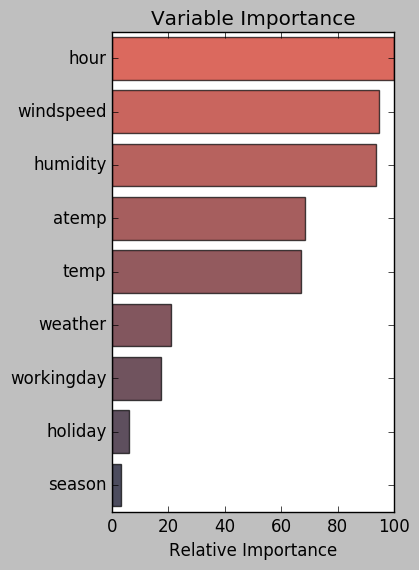

In [45]:
# Plot feature importance
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)


# Set color transparency (0: transparent; 1 solid)
a = 0.7
# Create a colormap
customcmap = [(x/10.0,  x/50.0, 0.1) for x in range(len(clf.feature_importances_))]
plt.barh(pos, feature_importance[sorted_idx], align='center',  alpha=a, color=customcmap)
plt.yticks(pos, feature_cols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
plt.savefig("featureImportance.png")

### preliminary_exploration


                hour     month      temp     atemp  humidity  windspeed  \
hour        1.000000 -0.006818  0.145430  0.140343 -0.278011   0.146631   
month      -0.006818  1.000000  0.257589  0.264173  0.204537  -0.150192   
temp        0.145430  0.257589  1.000000  0.984948 -0.064949  -0.017852   
atemp       0.140343  0.264173  0.984948  1.000000 -0.043536  -0.057473   
humidity   -0.278011  0.204537 -0.064949 -0.043536  1.000000  -0.318607   
windspeed   0.146631 -0.150192 -0.017852 -0.057473 -0.318607   1.000000   
count       0.400601  0.166862  0.394454  0.389784 -0.317371   0.101369   
registered  0.380540  0.169451  0.318571  0.314635 -0.265458   0.091052   
casual      0.302045  0.092722  0.467097  0.462067 -0.348187   0.092276   

               count  registered    casual  
hour        0.400601    0.380540  0.302045  
month       0.166862    0.169451  0.092722  
temp        0.394454    0.318571  0.467097  
atemp       0.389784    0.314635  0.462067  
humidity   -0.317371   -

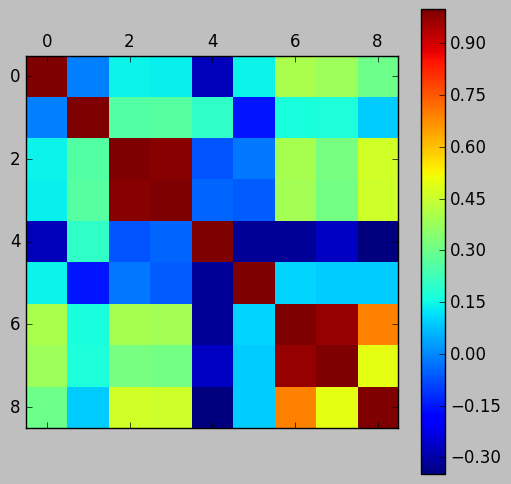

In [50]:
from scipy.stats.stats import pearsonr  

############################################################################################################
#read data
train = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\BikeSharing/train.csv", parse_dates=["datetime"])
train["hour"] = pd.DatetimeIndex(train['datetime']).hour
train["month"] = pd.DatetimeIndex(train['datetime']).month
train["year"] = pd.DatetimeIndex(train['datetime']).year
train["temp"] =  train.temp*9.0/5.0+32.0
train["atemp"] = train.atemp*9.0/5.0+32.0

############################################################################################################
#compute correlation between features
feature_cols = ['hour', 'month', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'registered', 'casual']
trainFI = train[feature_cols]

print(trainFI.corr())
plt.figure()
plt.matshow(trainFI.corr())
plt.colorbar()
plt.savefig("corrMatrix.png")



In [51]:
#compute pearson correlation for highly correlated features
corrPtemp = pearsonr(train.temp, train.atemp)
print(corrPtemp)
corrPWH = pearsonr(train.weather, train.humidity)
print(corrPWH)

(0.98494811048170761, 0.0)
(0.40624365131209733, 0.0)


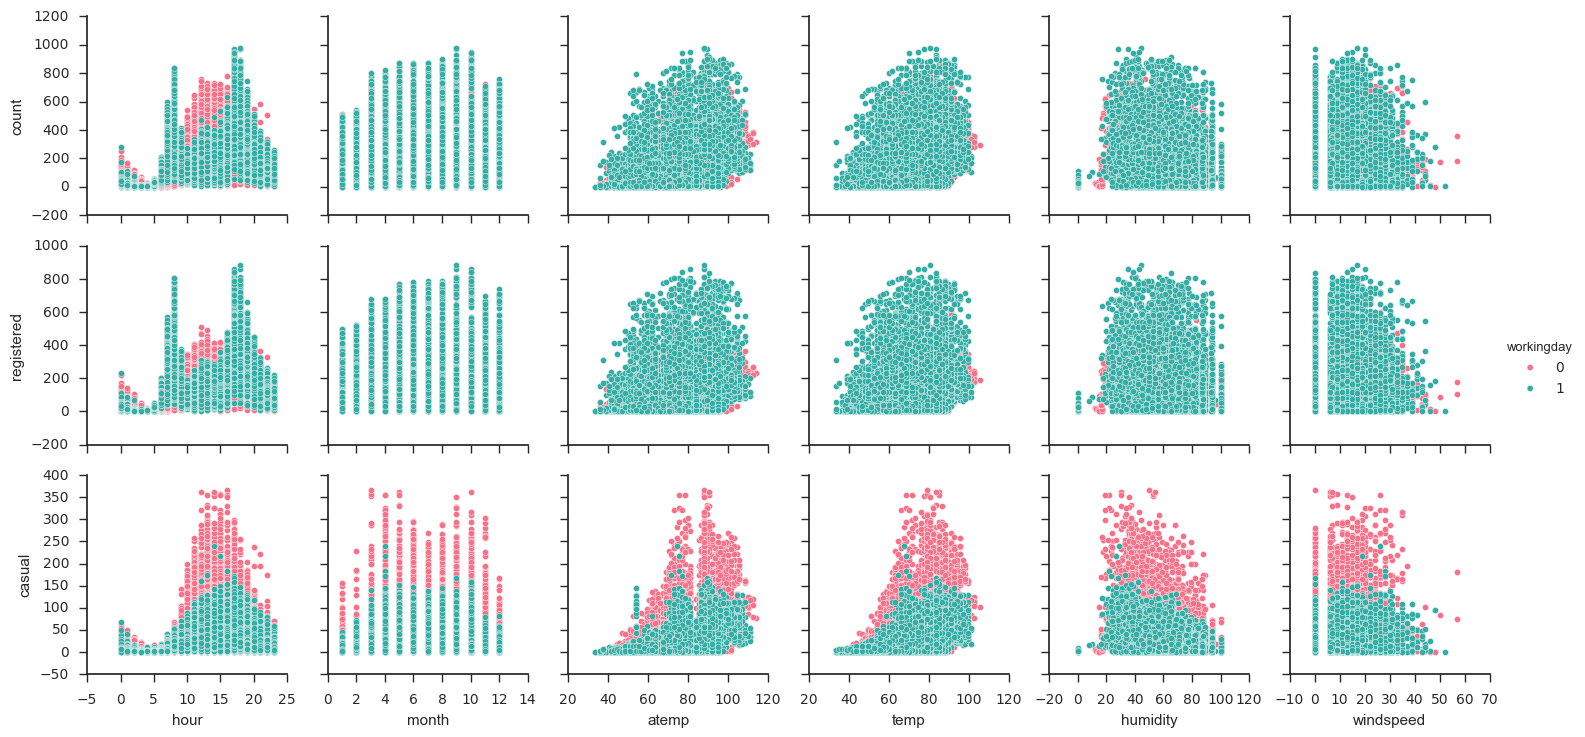

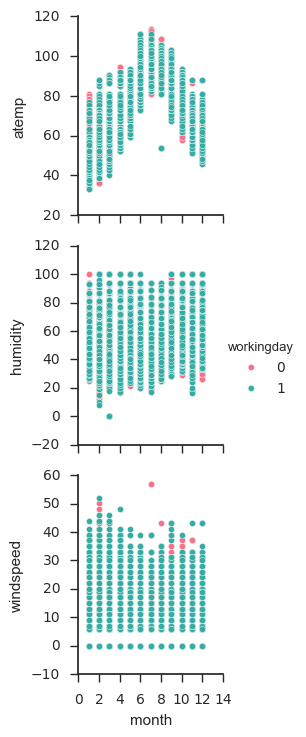

In [52]:
#exploratory analysis
import seaborn as sb; 
sb.set(style="ticks", color_codes=True)
sb_plot = sb.pairplot(train, hue="workingday", palette="husl",x_vars=['hour', 'month', 'atemp', 'temp', 'humidity', 'windspeed'], y_vars=["count", "registered","casual"])
sb_plot.savefig("exploratoryAnalysisGeneral.png")

sb_plot = sb.pairplot(train, hue="workingday", palette="husl",y_vars=['atemp', 'humidity', 'windspeed'], x_vars=["month"])
sb_plot.savefig("exploratoryAnalysisMonth.png")

### Bike Rentals by Time and Temperature 

In [53]:
bikes=pd.read_csv(r"C:\Users\piush\Desktop\Dataset\BikeSharing/train.csv", index_col='datetime',parse_dates=True)

In [54]:
bikes['temp_F']=bikes.temp*1.8+32

In [55]:
bikes.rename(columns={'count':'total'},inplace=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236


In [57]:
bikes['hour']=bikes.index.hour

In [58]:
bikes.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F,hour
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236,1


In [59]:
bikes['temp_cut']=pd.cut(bikes.temp_F,[40,60,80,100])

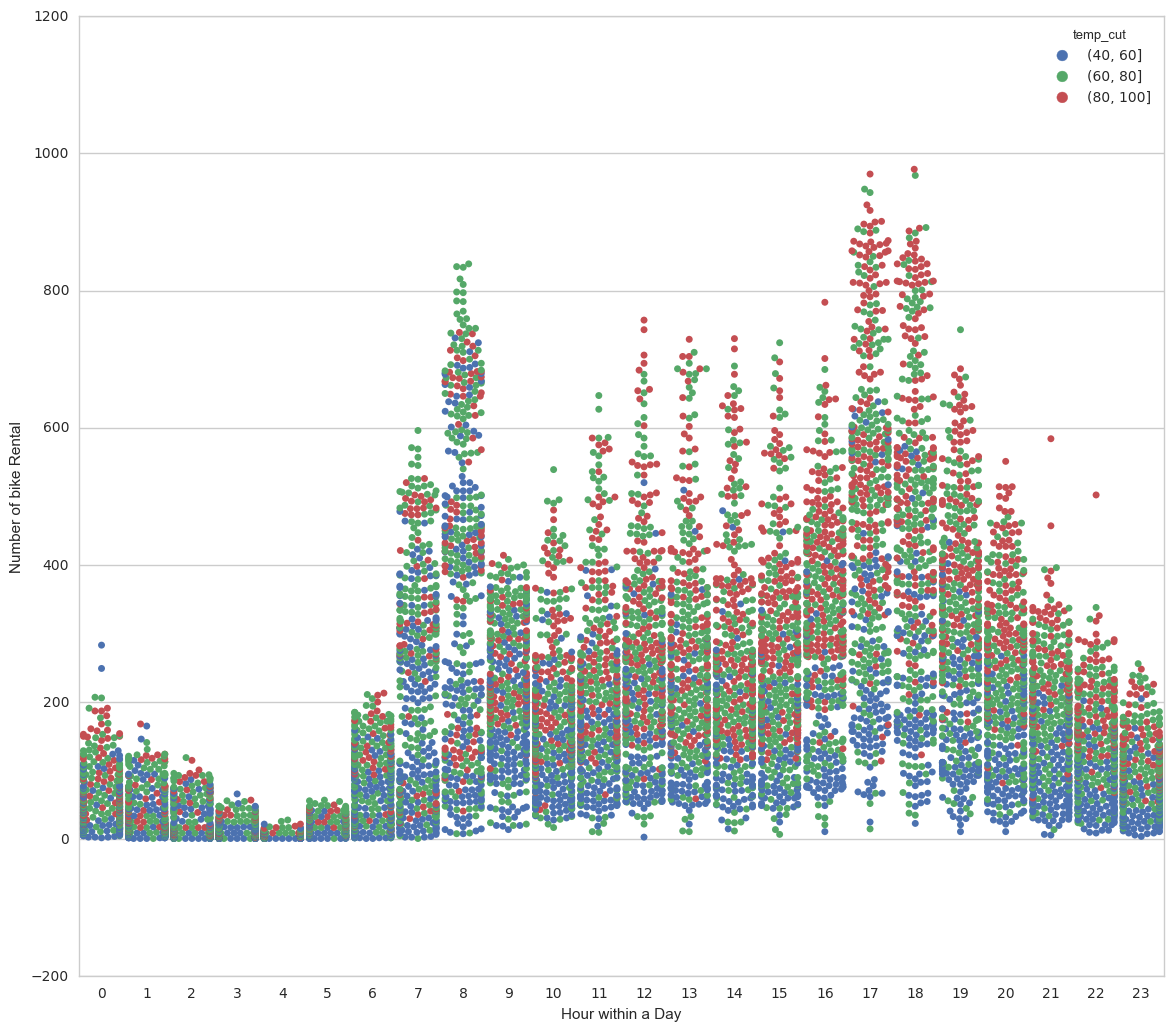

In [60]:
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=14
sns.set_style("whitegrid")
g=sns.swarmplot(x='hour',y='total',hue='temp_cut',data=bikes)
g.set(xlabel="Hour within a Day", ylabel="Number of bike Rental")

## Decision Tree

In [61]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Task 1
Run these two groupby statements and figure out what they tell you about the data

In [62]:
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [63]:
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

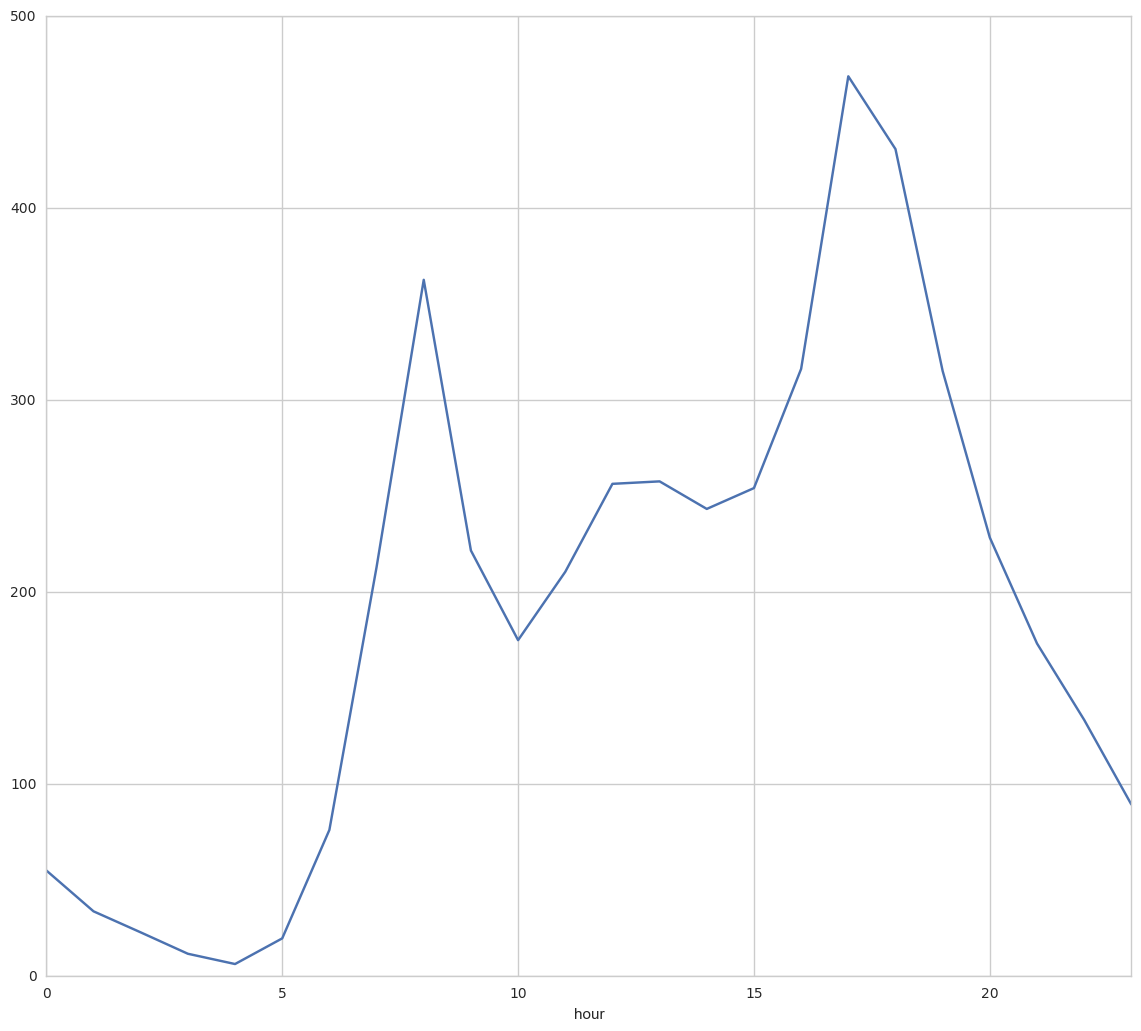

In [64]:
bikes.groupby('hour').total.mean().plot()

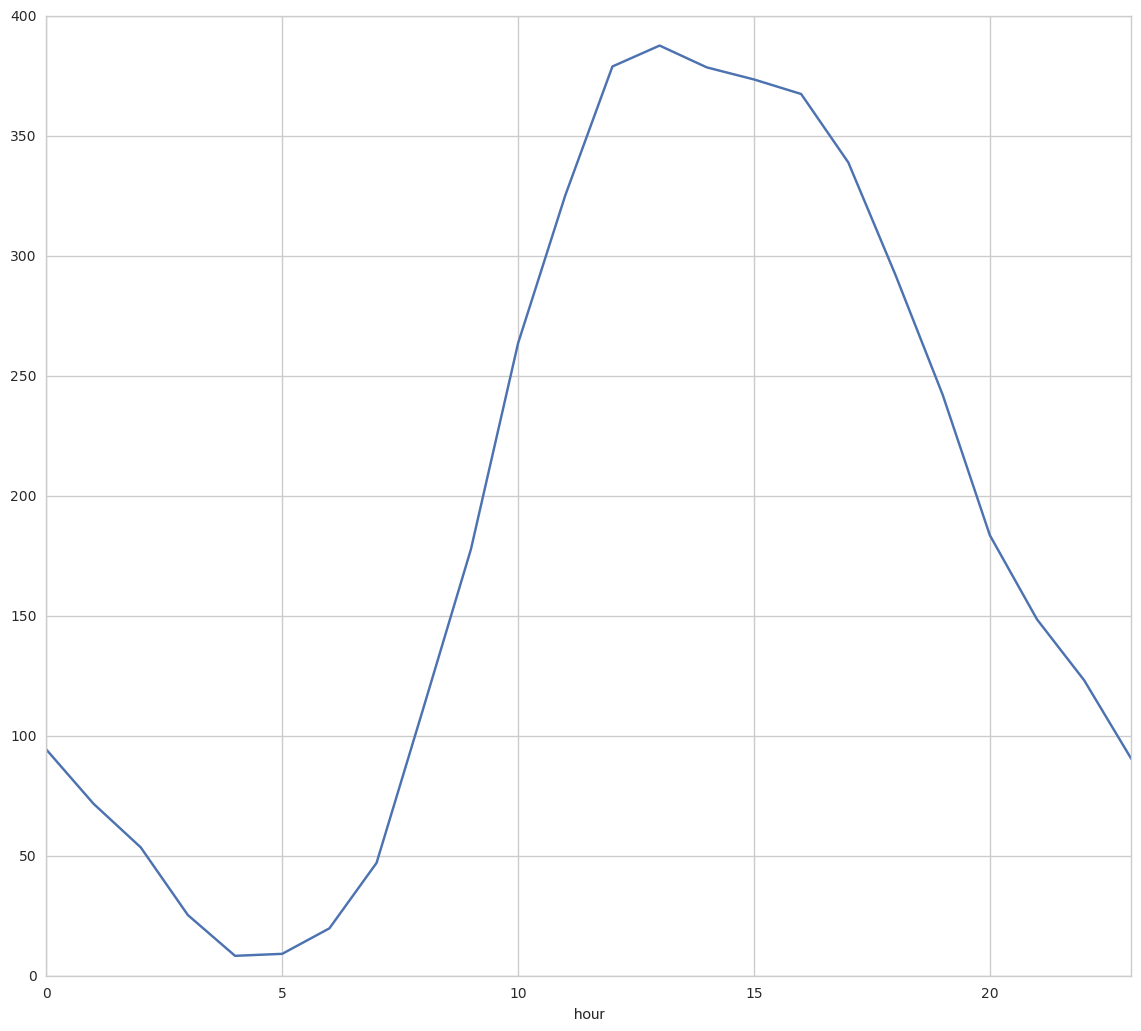

In [65]:
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

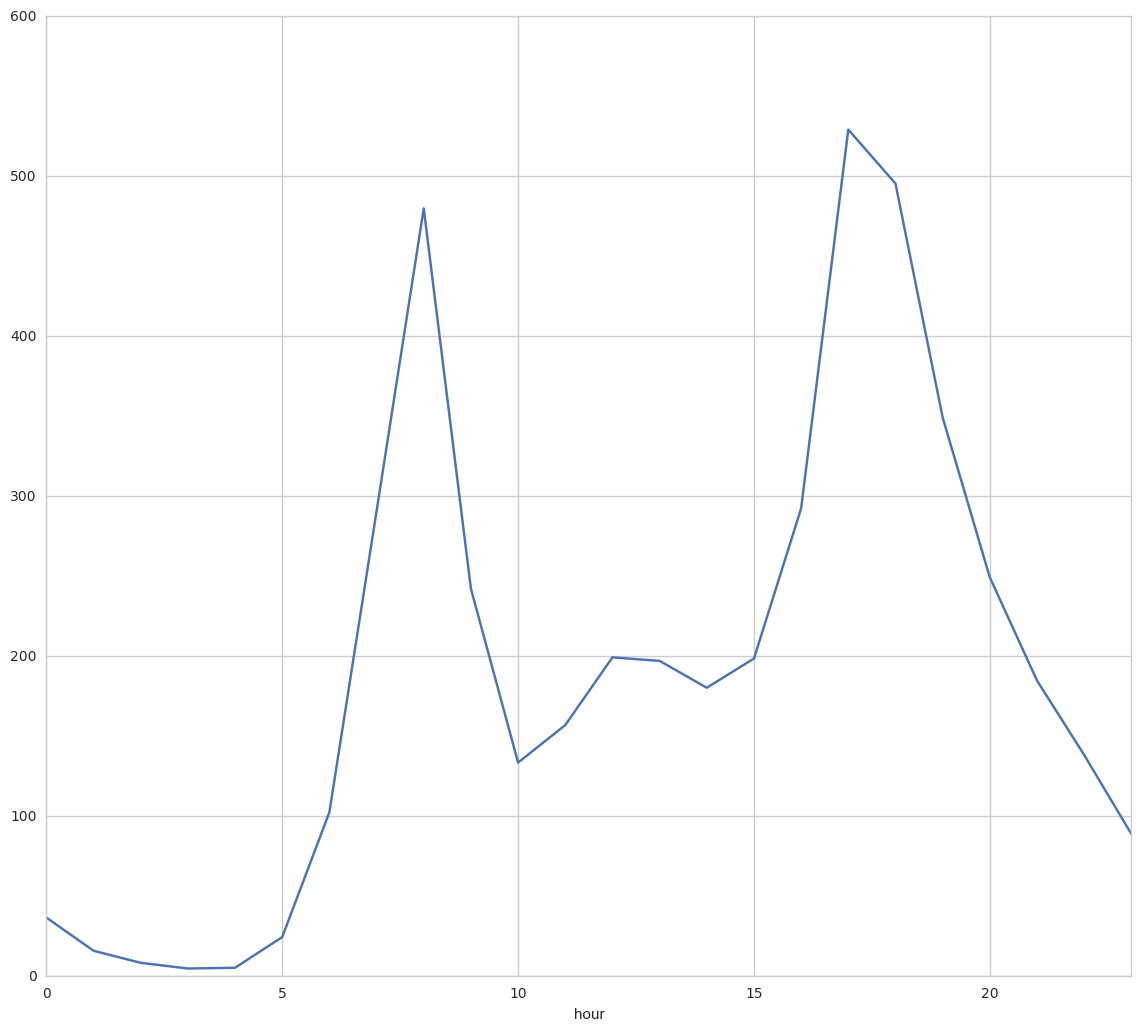

In [66]:
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

#### Plots two different plot for comparison

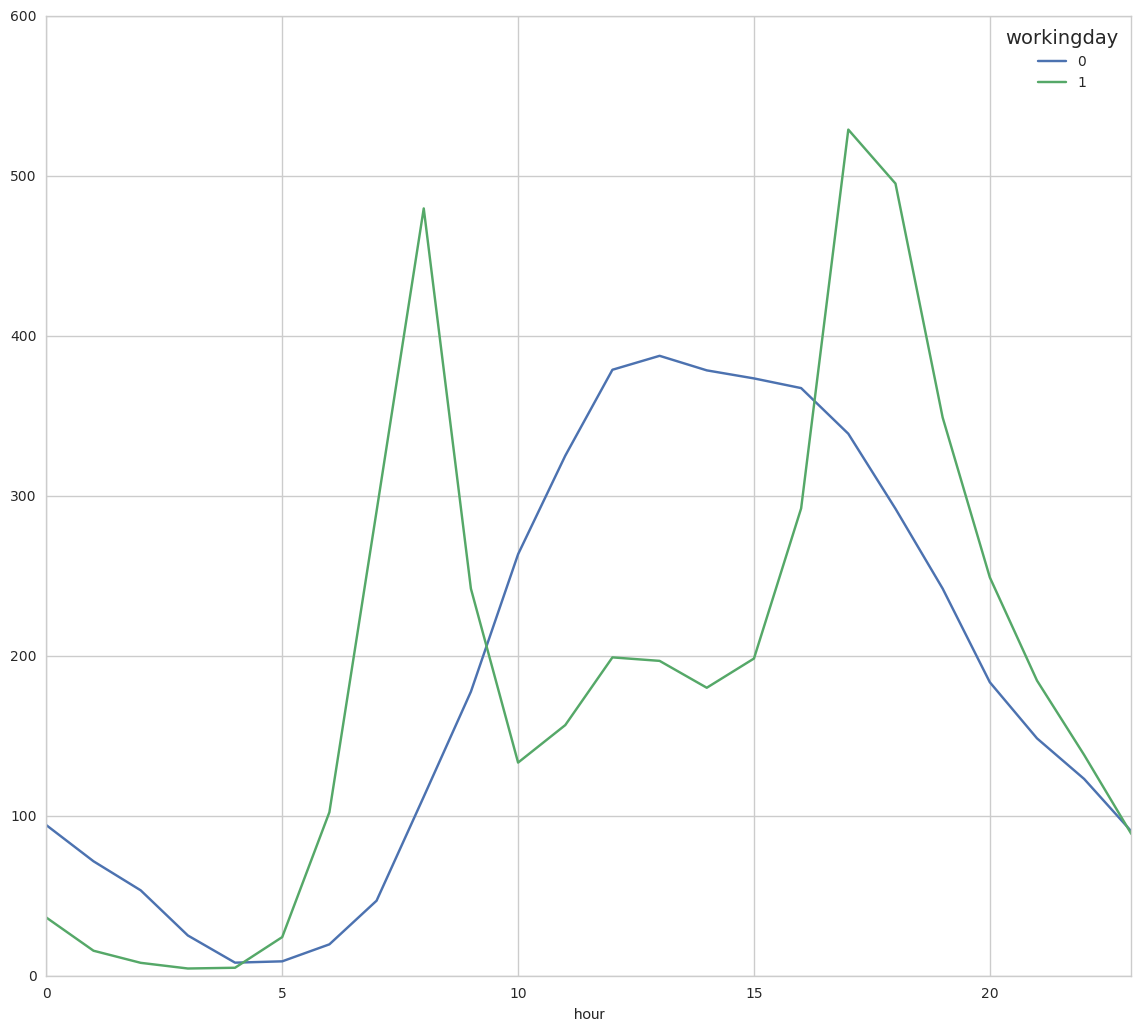

In [69]:
bikes.groupby(['hour','workingday']).total.mean().unstack().plot()

In [70]:
feature_cols = ['hour','workingday']
X = bikes[feature_cols]
y = bikes.total

In [71]:
linreg = LinearRegression()
linreg.fit(X,y)
linreg.coef_

array([ 10.49206282,   4.07248627])

In [75]:
scores = cross_val_score(linreg, X,y,cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

165.22328668912971

In [77]:
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
scores = cross_val_score(treereg, X, y, cv=10, scoring = "neg_mean_squared_error")
np.mean(np.sqrt(-scores))

107.64196789476493

In [78]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)
# create a Graphviz file
export_graphviz(treereg, out_file='tree.dot', feature_names=feature_cols)

In [79]:
treereg.feature_importances_

array([ 0.99572261,  0.00427739])

In [80]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,hour,0.995723
1,workingday,0.004277
